In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

/Users/pragyal/anaconda2/envs/py3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data= pd.read_csv("covid19_data.csv")

In [3]:

data.shape

(253, 8)

In [4]:
data.head()

,Province/State,Country/Region,Long,Lat,Confirmed,Date,death,recovered
0,NaN,Afghanistan,67.709953,33.93911,35526.0,7/20/20,1185.0,23741
1,NaN,Albania,20.168300,41.15330,4171.0,7/20/20,113.0,2352
2,NaN,Algeria,1.659600,28.03390,23691.0,7/20/20,1087.0,16400
3,NaN,Andorra,1.521800,42.50630,884.0,7/20/20,52.0,803
4,NaN,Angola,17.873900,-11.20270,749.0,7/20/20,29.0,221


In [5]:
data.dtypes

Province/State     object
Country/Region     object
Long              float64
Lat               float64
Confirmed         float64
Date               object
death             float64
recovered           int64
dtype: object

In [6]:
# Tosuppress scientific notation in Pandas 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:

#This will only display numerical dataset 
data.describe()

#if you want to display all add use this:
#data.describe(include= "all")

,Long,Lat,Confirmed,death,recovered
count,253.00000,253.00000,241.00000,241.00000,253.00000
mean,27.99707,19.83514,60389.96266,2490.19917,32768.50198
std,67.35820,24.50455,299312.60303,11775.18503,138432.07671
min,-106.34680,-51.79630,1.00000,0.00000,0.00000
25%,-8.22450,6.42806,287.00000,3.00000,172.00000
50%,23.88130,21.52176,1930.00000,38.00000,1022.00000
75%,85.24010,39.30540,17844.00000,340.00000,8659.00000
max,178.06500,71.70690,3830010.00000,140906.00000,1514300.00000


In [8]:
# Convert Date to Date-Time format
data["Date"]= data["Date"].apply(pd.to_datetime)

In [9]:
# Country/Region affected 
Countries= data["Country/Region"].unique().tolist()

print (" Total countries affected by Corona: ", len(Countries))

 Total countries affected by Corona:  188


In [10]:
data.groupby(["Country/Region","Province/State"]).sum()

Long       Lat  Confirmed  \
Country/Region Province/State                                                
Australia      Australian Capital Territory 149.01240 -35.47350  113.00000   
               New South Wales              151.20930 -33.86880 3599.00000   
               Northern Territory           130.84560 -12.46340   31.00000   
               Queensland                   153.02510 -27.46980 1072.00000   
               South Australia              138.60070 -34.92850  444.00000   
...                                               ...       ...        ...   
United Kingdom Falkland Islands (Malvinas)  -59.52360 -51.79630   13.00000   
               Gibraltar                     -5.35360  36.14080  180.00000   
               Isle of Man                   -4.54810  54.23610  336.00000   
               Montserrat                   -62.18737  16.74250   12.00000   
               Turks and Caicos Islands     -71.79790  21.69400   81.00000   

                                               death  recovered  
Country/Region Province/State                                    
Australia      Australian Capital Territory  3.00000        107  
               New South Wales              49.00000       2988  
               Northern Territory            0.00000         29  
               Queensland                    6.00000       1061  
               South Australia               4.00000        440  
...                                              ...        ...  
United Kingdom Falkland Islands (Malvinas)   0.00000         13  
               Gibraltar                     0.00000        180  
               Isle of Man                  24.00000        312  
               Montserrat                    1.00000         10  
               Turks and Caicos Islands      2.00000         22  

[67 rows x 5 columns]

In [11]:
data.groupby("Province/State")["death"].sum().sort_values(ascending=False)[:5]

Province/State
Hubei             4512.00000
New South Wales     49.00000
Channel Islands     47.00000
Victoria            42.00000
French Guiana       38.00000
Name: death, dtype: float64

In [12]:
data.groupby("Country/Region")["death"].sum().sort_values(ascending=False)[:10]

Country/Region
US               140906.00000
Brazil            80120.00000
United Kingdom    45397.00000
Mexico            39485.00000
Italy             35058.00000
France            30180.00000
Spain             28422.00000
India             28082.00000
Iran              14405.00000
Peru              13187.00000
Name: death, dtype: float64

In [13]:
data.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)[:10]

Country/Region
US               3830010.00000
Brazil           2118646.00000
India            1155338.00000
Russia            776212.00000
South Africa      373628.00000
Peru              353590.00000
Mexico            349396.00000
Chile             330930.00000
United Kingdom    296944.00000
Iran              276202.00000
Name: Confirmed, dtype: float64

In [14]:
data.groupby("Province/State")["recovered"].sum().sort_values(ascending=False)[:10]

Province/State
Hubei              63623
French Guiana       4714
New South Wales     2988
Victoria            2933
Mayotte             2591
Guangdong           1636
Zhejiang            1267
Hong Kong           1254
Henan               1254
Queensland          1061
Name: recovered, dtype: int64

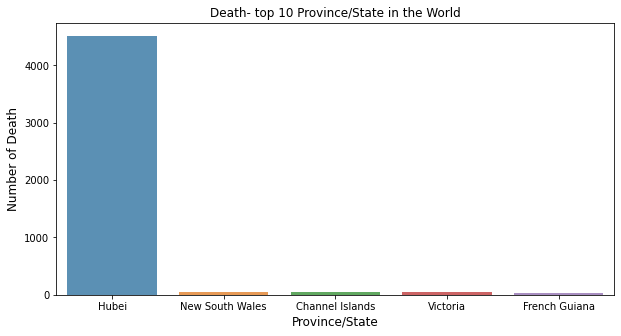

In [35]:
Province= data.groupby("Province/State")["death"].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(10,5))
sns.barplot(Province.index, Province.values, alpha=0.8)
plt.title('Death- top 10 Province/State in the World')
plt.ylabel('Number of Death', fontsize=12)
plt.xlabel('Province/State', fontsize=12)
plt.show()

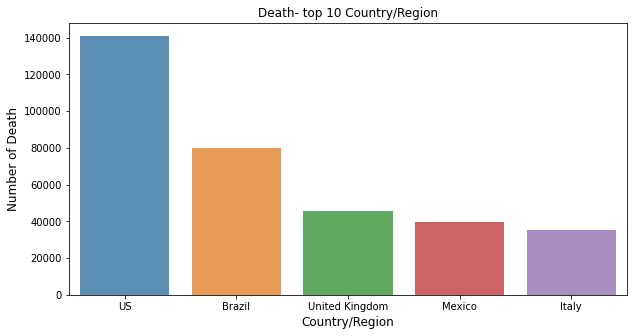

In [34]:
Country= data.groupby("Country/Region")["death"].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(10,5))
sns.barplot(Country.index, Country.values, alpha=0.8)
plt.title('Death- top 10 Country/Region')
plt.ylabel('Number of Death', fontsize=12)
plt.xlabel('Country/Region', fontsize=12)
plt.show()

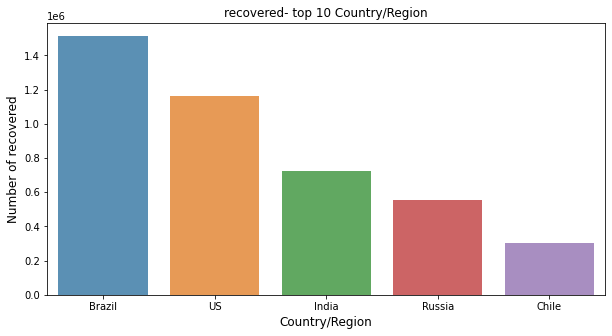

In [33]:
Province= data.groupby("Country/Region")["recovered"].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(10,5))
sns.barplot(Province.index, Province.values, alpha=0.8)
plt.title('recovered- top 10 Country/Region')
plt.ylabel('Number of recovered', fontsize=12)
plt.xlabel('Country/Region', fontsize=12)
plt.show()

In [29]:
# Visualisation of Confirmed, death and recoved

In [28]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(data)):
        Lat = data.iloc[i]['Lat']
        Long = data.iloc[i]['Long']
        radius=5
        popup_text = """Country/Region : {}<br>
                    Confirmed : {}<br>
                    death: {} <br>
                    recovered:{} <br>
                    Date:{} <br>"""
        popup_text = popup_text.format(data.iloc[i]['Country/Region'],
                                    data.iloc[i]['Confirmed'],
                                    data.iloc[i]['death'],
                                   data.iloc[i]['recovered'],
                                    data.iloc[i]['Date']
                                   )
        folium.CircleMarker(location = [Lat, Long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map